In [30]:
"""input central density value
calculate central pressure
use as p0 for HSE equations
"""

'input central density value\ncalculate central pressure\nuse as p0 for HSE equations\n'

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
G = 6.67430e-11  # Gravitational constant in N*m^2/kg^2
M_sun = 1.989e30  # Solar mass in kg
R_sun = 6.955e10  # Solar radius in m
K_NR = 1.2435e15  # Constant for non-relativistic electron degenerate gas (cgs units)
m_e = 9.11e-31
hbar = 1.05457182e-34
c = 2.99e8
a_z = 2
m_n = 1.67e-27

In [32]:
def K_NR():
    """Inverse EOS to get density from pressure for non-relativistic case"""
    return (hbar**2  * (3 * np.pi**2 / (a_z * m_n * c**2))**(5/3)) / (15 * np.pi**2 * m_e)

def K_R():
    """Inverse EOS to get density from pressure for relativistic case"""
    return (hbar* c  * (3 * np.pi**2 / (a_z * m_n * c**2))**(4/3)) / (12 * np.pi**2)


def rho_from_pressure(P,K):
    if K == K_NR:
        n = 5/3
    else:
        n=4/3
    return (P/K())**(1/n) / c**2

def calc_p0(rho_0, K):
    if K == K_NR:
        n = 5/3
    else:
        n=4/3
    
    return K() * (rho_0 * c**2)**(n)

In [33]:
K_NR()

1.751714011328775e-22

In [34]:
# ----------------- Structure Solver -----------------
def hydrostatic_equilibrium(r, y, K):
    """Equation for hydrostatic equilibrium: y[0]=Pressure, y[1]=Mass"""
    P, M = y
    rho = rho_from_pressure(P, K)  # Calculate density from pressure

    dP_dr = (-G * M * rho) / (r**2)
    dM_dr = 4 * np.pi * r**2 * rho
    return [dP_dr, dM_dr]

In [35]:
# ----------------- Event to Stop at Pressure < threshold -----------------
def stop_at_pressure_threshold(r, y, K):
    threshold_pressure = 1e-3  # Define a small threshold for pressure
    return y[0] - threshold_pressure  # Stop when pressure y[0] < threshold_pressure

# ----------------- Main Integration Function -----------------
def integrate_star(central_pressure,K):
    """Solve the structure equations numerically"""
    radius = 1e9
    
    sol = solve_ivp(hydrostatic_equilibrium, [1e-6, radius], [central_pressure, 0], 
                    events=stop_at_pressure_threshold, dense_output=True, max_step=1e4, args=(K,))
    
    return sol.t, sol.y[0], sol.y[1]  # Return radius, pressure, and mass profiles


C:\Users\Lenovo ThinkPad\AppData\Local\Temp\ipykernel_8940\902848793.py:15: RuntimeWarning: invalid value encountered in scalar power
  return (P/K())**(1/n) / c**2


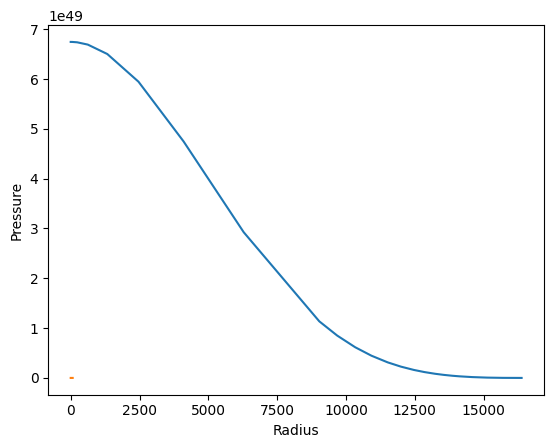

final radius 1.030973607722186e-09 final mass 1.4310109939012712
Final Pressure 2.7689976498294234e-14


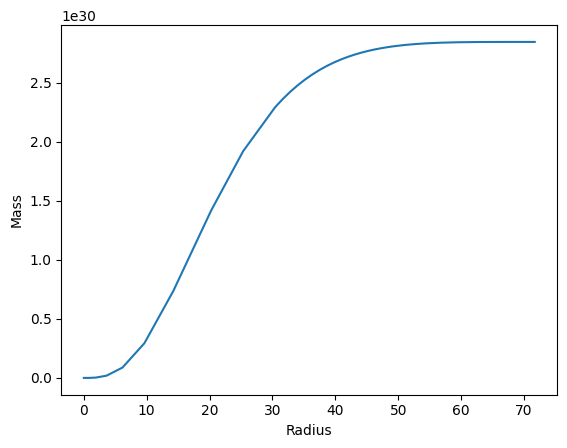

In [36]:
central_density = 1e23
p0 = calc_p0(central_density,K_NR)

radius, pressure, mass = integrate_star(p0, K_NR)
plt.plot(radius,pressure)
p0 = calc_p0(central_density,K_R)
radius, pressure, mass = integrate_star(p0, K_R)
plt.plot(radius,pressure)
plt.xlabel("Radius")
plt.ylabel("Pressure")
plt.show()

plt.plot(radius,mass)
plt.xlabel("Radius")
plt.ylabel("Mass")



# Extract the final radius and mass when pressure drops to (near) zero
final_radius = radius[-1] / R_sun  # Convert to solar radii
final_mass = mass[-1] / M_sun  # Convert to solar masses
final_pressure = pressure[-1]

print("final radius", final_radius,"final mass",final_mass)

print("Final Pressure", final_pressure)


C:\Users\Lenovo ThinkPad\AppData\Local\Temp\ipykernel_8940\902848793.py:15: RuntimeWarning: invalid value encountered in scalar power
  return (P/K())**(1/n) / c**2


[0.001093422286437016, 0.0010477783179657937, 0.0010040397088498275, 0.0009621269248094749, 0.0009219637665638125, 0.0008834771706380458, 0.0008465971729546909, 0.000811256696817585, 0.0007773914674759117, 0.0007449399355541382]
[0.014378145219266714, 0.014378145219266714, 0.014378145219266714, 0.014378145219266714, 0.014378145219266714, 0.014378145219266714, 0.013317919982198733, 0.012229237122828578, 0.01122954937665585, 0.010311581733671728]


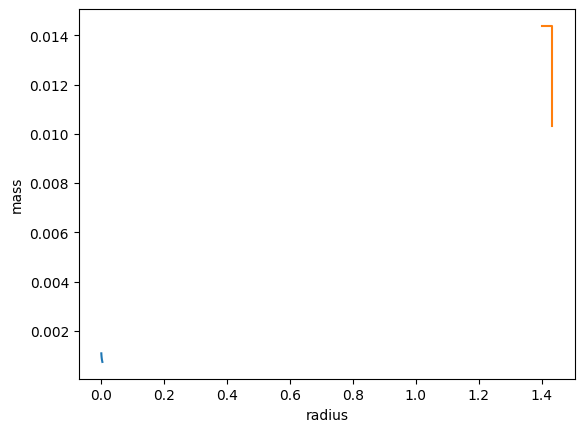

In [39]:
rho_0s = np.logspace(4,5, 10)
radii = []
masses = []

for rho_0 in rho_0s:
    p0 = calc_p0(rho_0,K_NR)
    radius, pressure, mass = integrate_star(p0,K_NR)
    radii.append(radius[-1]/R_sun)
    masses.append(mass[-1]/M_sun)

plt.plot(masses,radii)
print(radii)


rho_0s = np.logspace(4,5, 10)
radii = []
masses = []

for rho_0 in rho_0s:
    p0 = calc_p0(rho_0,K_R)
    radius, pressure, mass = integrate_star(p0,K_R)
    radii.append(radius[-1]/R_sun)
    masses.append(mass[-1]/M_sun)


plt.plot(masses,radii)
print(radii)

plt.xlabel("radius")
plt.ylabel("mass")
plt.show()

In [38]:
print(np.logspace(8,10, 50))

[1.00000000e+08 1.09854114e+08 1.20679264e+08 1.32571137e+08
 1.45634848e+08 1.59985872e+08 1.75751062e+08 1.93069773e+08
 2.12095089e+08 2.32995181e+08 2.55954792e+08 2.81176870e+08
 3.08884360e+08 3.39322177e+08 3.72759372e+08 4.09491506e+08
 4.49843267e+08 4.94171336e+08 5.42867544e+08 5.96362332e+08
 6.55128557e+08 7.19685673e+08 7.90604321e+08 8.68511374e+08
 9.54095476e+08 1.04811313e+09 1.15139540e+09 1.26485522e+09
 1.38949549e+09 1.52641797e+09 1.67683294e+09 1.84206997e+09
 2.02358965e+09 2.22299648e+09 2.44205309e+09 2.68269580e+09
 2.94705170e+09 3.23745754e+09 3.55648031e+09 3.90693994e+09
 4.29193426e+09 4.71486636e+09 5.17947468e+09 5.68986603e+09
 6.25055193e+09 6.86648845e+09 7.54312006e+09 8.28642773e+09
 9.10298178e+09 1.00000000e+10]
